# Project-1 Diwali_sales_Analysis BY Rishabh Mishra

In [1]:
# Importing necessary libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
# For plotting graphs
import matplotlib.pyplot as plt
 # To display plots inline in Jupyter notebook
%matplotlib inline       
import seaborn as sns     # For advanced data visualization


In [2]:
# Reading the dataset with proper encoding to handle special characters
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')


In [3]:
# Checking the dimensions of the dataset (rows, columns)
df.shape

(11251, 15)

In [4]:
# Displaying the first few rows of the dataset to understand the structure
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Getting a summary of the dataset, including column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Dropping unnecessary columns ('Status', 'unnamed1') from the dataset
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [7]:
# Verifying if the unnecessary columns were successfully dropped
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
# Checking for missing values in the dataset
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Checking the shape of the dataset again to verify if there are any changes after dropping columns
df.shape


(11251, 13)

In [10]:
# Dropping rows with missing values to clean the dataset
df.dropna(inplace=True)


In [11]:
# Verifying the shape of the dataset after removing rows with missing values
df.shape

(11239, 13)

In [12]:
# Creating a small test dataset with missing values
data_test = [['abhishek', 2004], ['Neha', 2006], ['Boby', None], ['Sonam', 2004], ['Deepti', 2006]]


In [13]:
# Converting the test data into a pandas DataFrame
df_test = pd.DataFrame(data_test, columns=['Name', 'Age'])

In [14]:
# Displaying the test DataFrame with missing values
df_test

,Name,Age
0,abhishek,2004.0
1,Neha,2006.0
2,Boby,NaN
3,Sonam,2004.0
4,Deepti,2006.0


In [15]:
# Dropping rows with missing values in the test DataFrame
df_test.dropna(inplace=True)



In [16]:
# Displaying the cleaned test DataFrame
df_test

,Name,Age
0,abhishek,2004.0
1,Neha,2006.0
3,Sonam,2004.0
4,Deepti,2006.0


In [17]:
# Converting the 'Amount' column to integer type for numerical analysis
df['Amount'] = df['Amount'].astype('int')


In [18]:
# Checking the data type of 'Amount' to confirm the conversion
df['Amount'].dtypes


dtype('int32')

In [19]:
# Displaying all column names of the dataset
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
# Renaming the 'Marital_Status' column to 'Shadi' (optional, not necessary in final code)
df.rename(columns={'Marital_Status': 'Shadi'})



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [21]:
# Getting a descriptive summary (mean, min, max, etc.) for 'Age', 'Orders', and 'Amount'
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [22]:
# Displaying all column names again
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

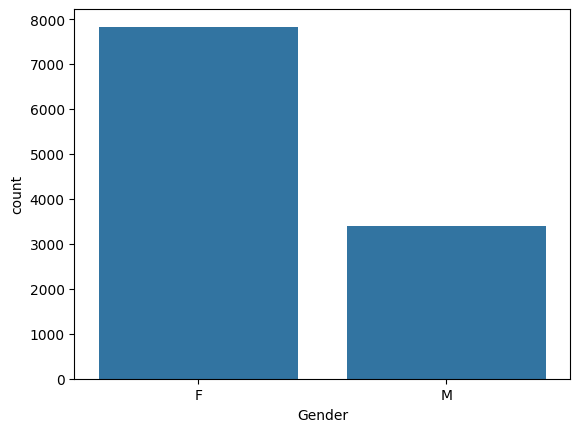

In [23]:
# Visualizing the gender distribution in the dataset using a count plot
sns.countplot(x='Gender', data=df)


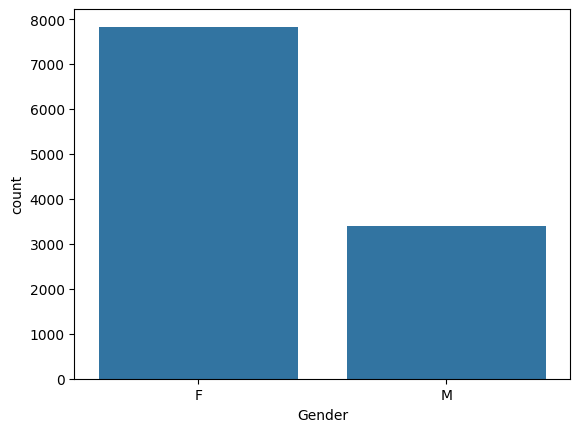

In [24]:
# Creating a count plot of gender distribution with bar labels
ax = sns.countplot(x='Gender', data=df)


In [25]:
# Adding labels to the bars in the plot
for bars in ax.containers:
    ax.bar_label(bars)

In [26]:
# Grouping the dataset by 'Gender' and calculating total 'Amount' for each group
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [27]:
# Creating a summary of sales by gender and sorting by total sales amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

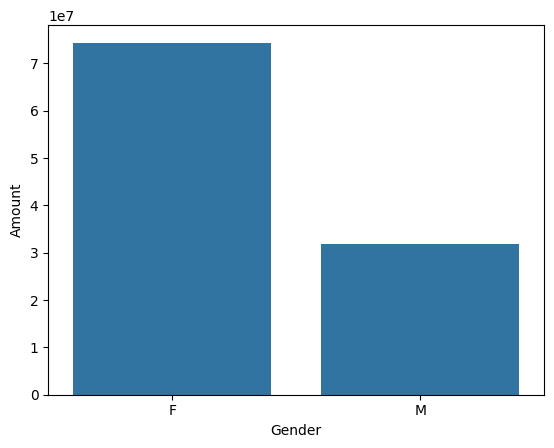

In [28]:
# Visualizing the sales by gender using a bar plot
sns.barplot(x='Gender', y='Amount', data=sales_gen)

In [29]:
# Displaying all columns of the dataset
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

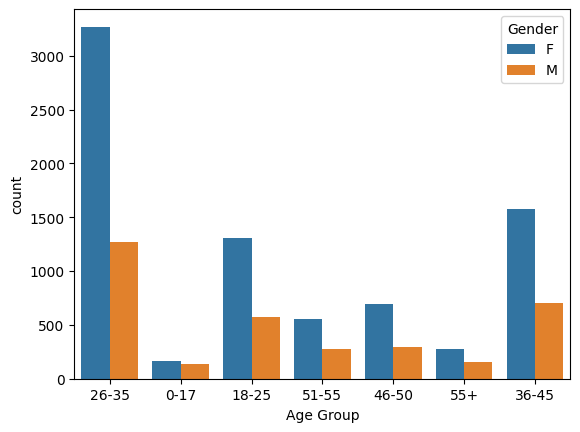

In [30]:
# Visualizing the distribution of sales by 'Age Group' with gender as a hue using a count plot
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

In [31]:
# Adding labels to the bars in the age group plot
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
# Grouping the dataset by 'Age Group' and calculating total 'Amount' for each group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

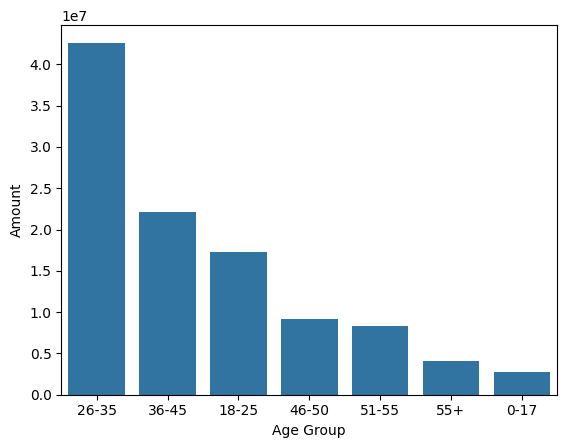

In [33]:
# Visualizing total sales by age group using a bar plot
sns.barplot(x='Age Group', y='Amount', data=sales_age)

In [34]:
# Grouping the dataset by 'State' and calculating the total number of 'Orders' for the top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [35]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (15, 5)})


<Axes: xlabel='State', ylabel='Orders'>

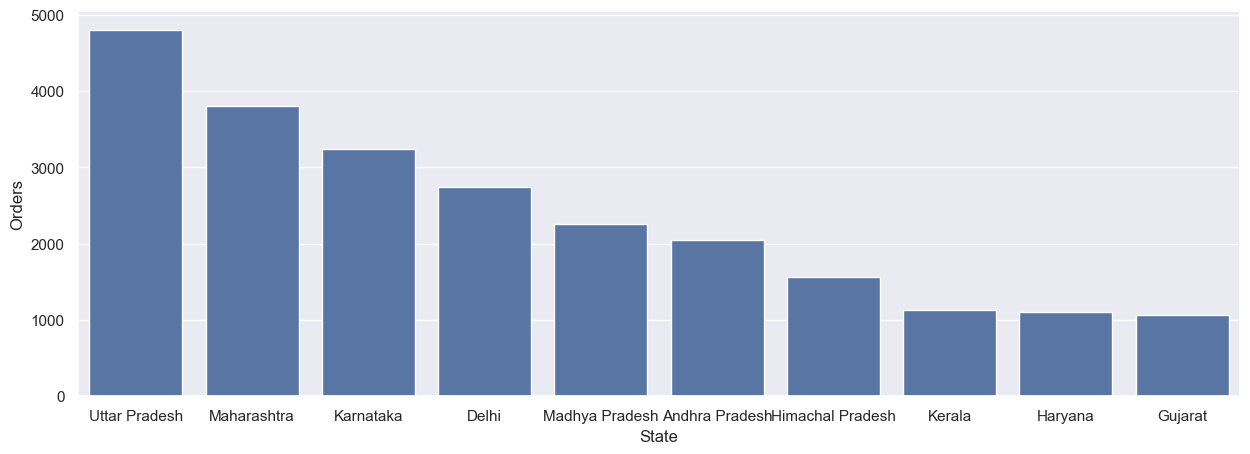

In [36]:
# Visualizing total orders by state using a bar plot
sns.barplot(data=sales_state, x='State', y='Orders')

In [37]:
# Grouping the dataset by 'State' and calculating total 'Amount' for the top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

In [38]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (15, 5)})

<Axes: xlabel='State', ylabel='Amount'>

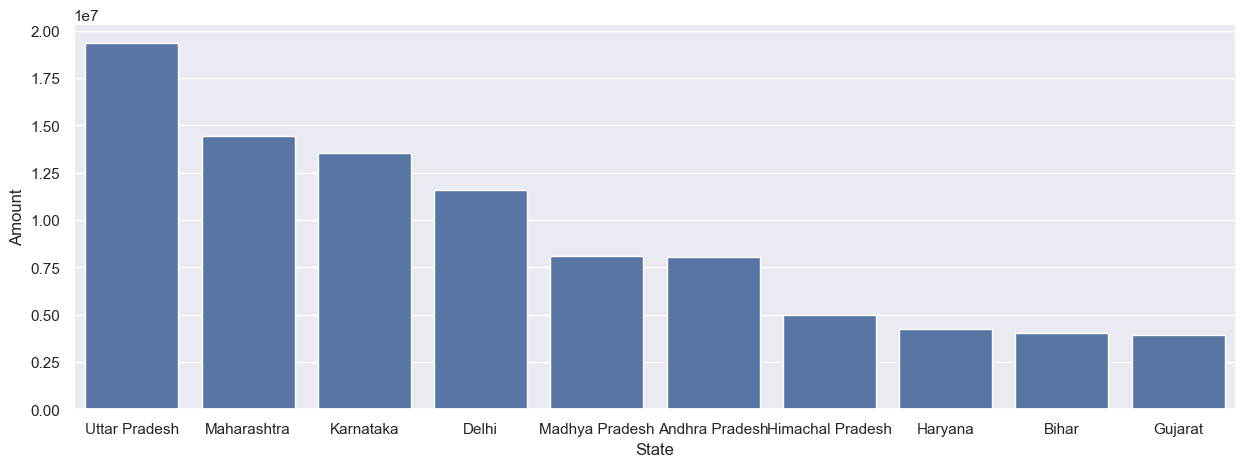

In [39]:
# Visualizing total sales by state using a bar plot
sns.barplot(data=sales_state, x='State', y='Amount')

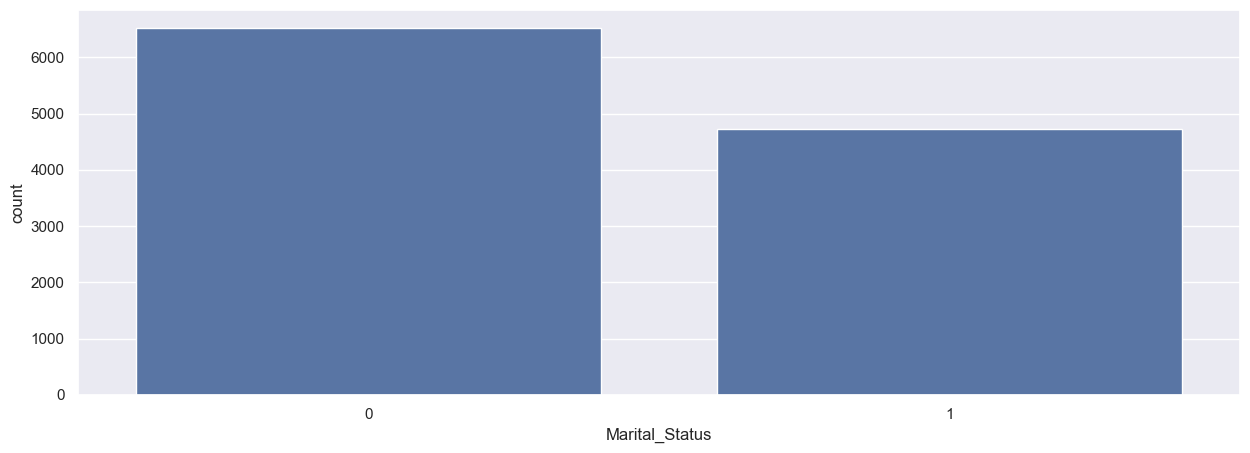

In [40]:
# Creating a count plot to visualize the distribution of marital status
ax = sns.countplot(data=df, x='Marital_Status')

In [41]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (7, 5)})

In [42]:
# Adding labels to the bars in the marital status plot
for bars in ax.containers:
    ax.bar_label(bars)

In [43]:
# Grouping the dataset by 'Marital_Status' and 'Gender' and calculating total 'Amount' for each combination
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [44]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (6, 5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

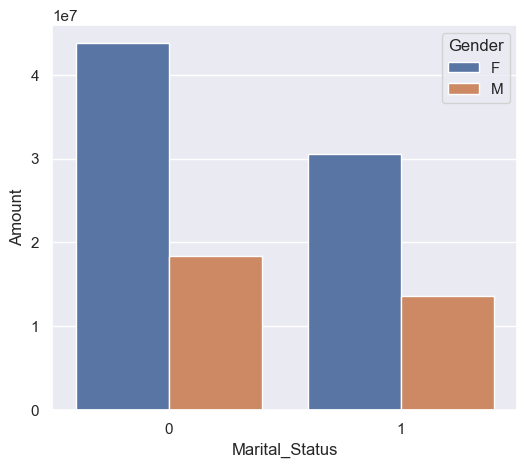

In [45]:
# Visualizing the total sales by marital status and gender using a bar plot
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

In [46]:
# Setting the figure size for the next plot
sns.set(rc={'figure.figsize': (20, 5)})

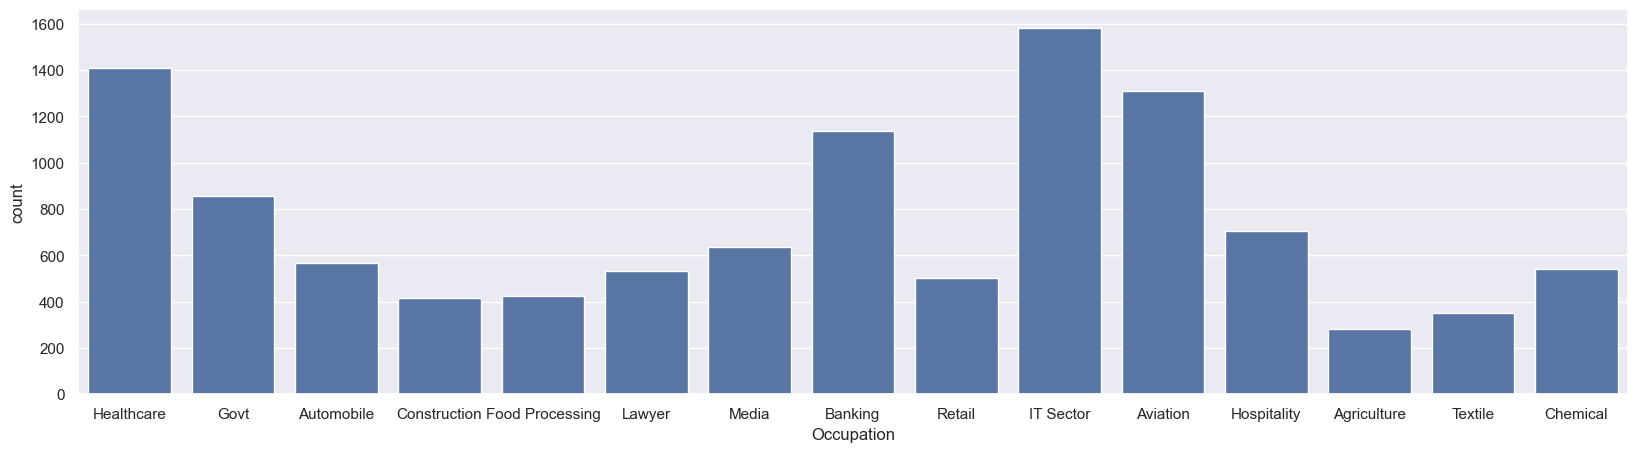

In [47]:
# Creating a count plot to visualize the distribution of customers by occupation
ax = sns.countplot(data=df, x='Occupation')


In [48]:
# Adding labels to the bars in the occupation plot
for bars in ax.containers:
    ax.bar_label(bars)

In [49]:
# Setting the figure size for the next plot
sns.set(rc={'figure.figsize': (20, 5)})


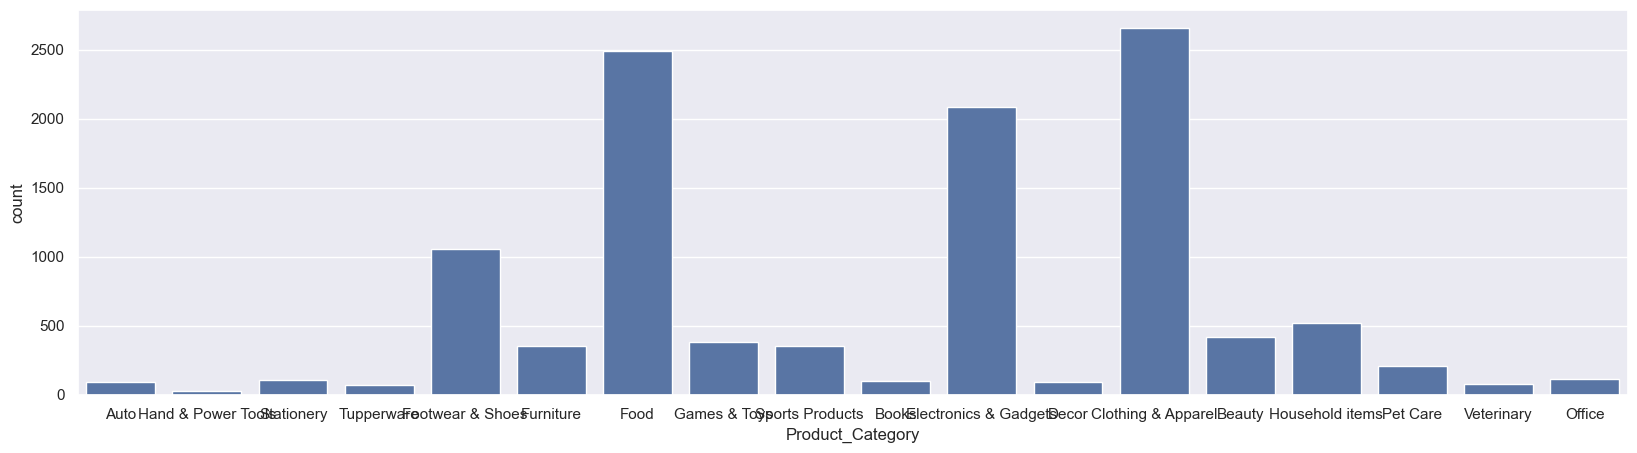

In [50]:
# Creating a count plot to visualize the distribution of products by category
ax = sns.countplot(data=df, x='Product_Category')

In [51]:
# Adding labels to the bars in the product category plot
for bars in ax.containers:
    ax.bar_label(bars)


In [52]:
# Grouping the dataset by 'Product_Category' and calculating total 'Amount' for the top 10 categories
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

<Axes: xlabel='Product_Category', ylabel='Amount'>

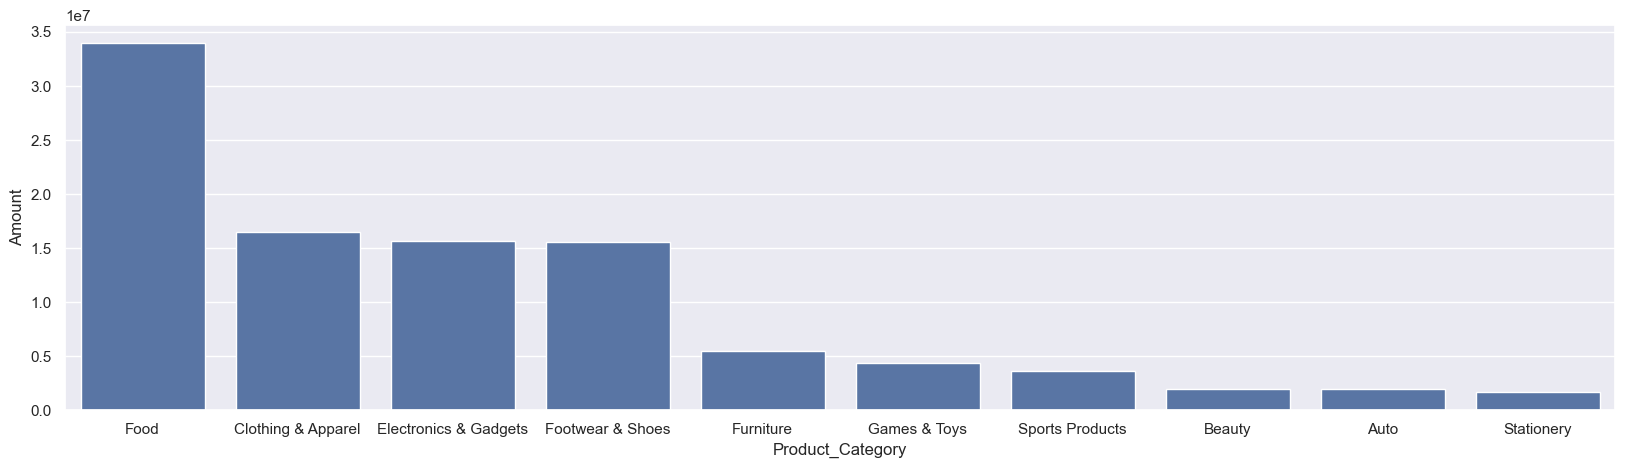

In [53]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (20, 5)})
# Visualizing total sales by product category using a bar plot
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

In [54]:
# Grouping the dataset by 'Product_ID' and calculating the total number of 'Orders' for the top 10 products
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [55]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (20, 5)})


<Axes: xlabel='Product_ID', ylabel='Orders'>

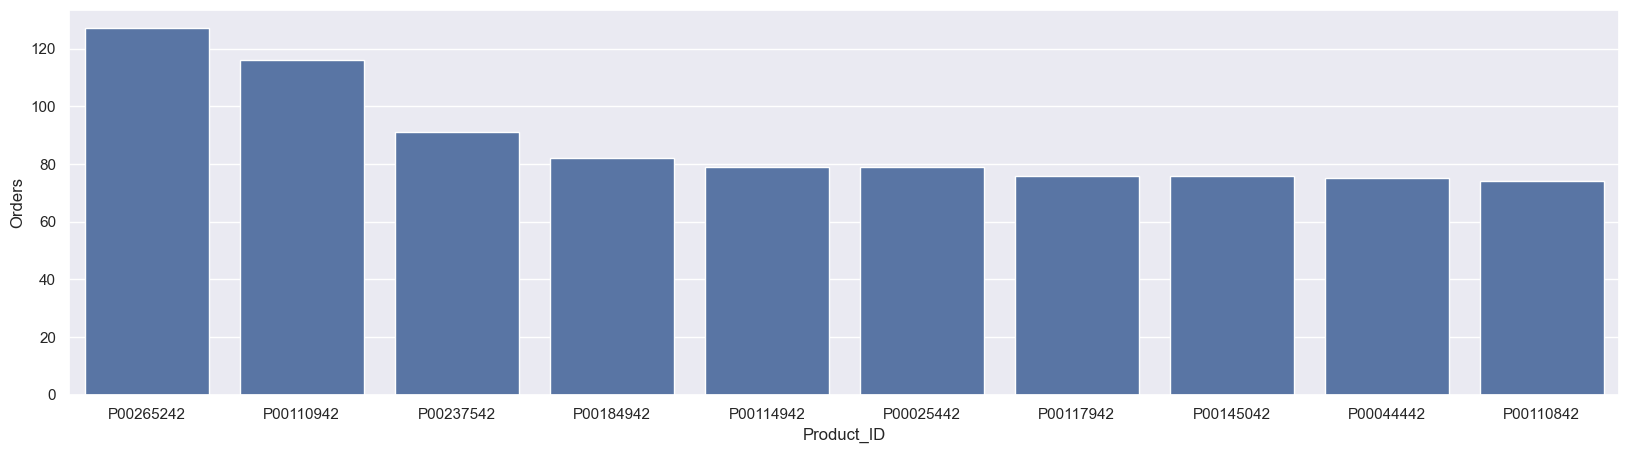

In [56]:
# Visualizing total orders by product ID using a bar plot
sns.barplot(data=sales_state, x='Product_ID', y='Orders')